<a href="https://colab.research.google.com/github/SudhakarAnemu/AI-DS-ML-DL/blob/master/DL_TensroFlow_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("js")

js


# Importing all required Libraries

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
!pip install tensorflow
!pip install scikit-learn
!pip install tensorflow-datasets

In [0]:
import tensorflow as tf

In [5]:
print("Version of the Tenserflow : ", tf.__version__)

Version of the Tenserflow :  2.1.0-rc1


##Section 4

### Example 1

Import all relevant libraries

In [6]:
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # nice graphs
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs
print("Import done")

Import done


Generate random input data to train on.
<br>we are about to create a two variable linear model :<br>f(x,z) = a*x +b*z +c
<br>From the linear model: inputs = n * k = 1000*2
<br>

In [7]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs, zs)) # define like a matrix
print("shape of the inputs(its like Matrix) : ", inputs.shape)

shape of the inputs(its like Matrix) :  (1000, 2)


Create the targets we will aim at
<br> targets = f(x,z) = 2*x - 3*z + 5 + noise
<br> here 2,3 are weights and 5 is the bias
<br> noise will always be there in the real data. 


In [8]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print("shape of the targets : ", targets.shape)
# print("Sample data : ", targets

shape of the targets :  (1000, 1)


In [9]:
print(targets.any)

<built-in method any of numpy.ndarray object at 0x7f41053f1cb0>


Plot the training data
<br>The point is to see that there is a strong trend that out model should learn to reproduce
<br>

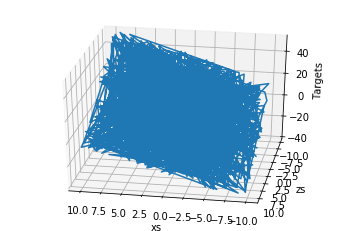

In [10]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Initialize variables
<br>Our initial weights and biases will be picked randomly from the interval [-0.1,0.1]
<br>weights : matrix, biases : scaler
<br>

In [11]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2,1))
print("Weights : ", weights)
biases = np.random.uniform(-init_range, init_range, size=1)
print("Biases : ", biases)

Weights :  [[-0.00134977]
 [-0.01384179]]
Biases :  [0.05684773]


Set a learning rate(eta)
<br>

In [0]:
learning_rate = 0.02 #we can play with different learning rates

Train the model
<br>Procedure will be repeated.
<br>Game plan for each iteration
<br>1. calculate outputs
<br>2. compare outputs to targets through the loss
<br>3. print the loss
<br>4. Adjust weights and biases
<br>

In [13]:
for i in range(5000):
  outputs = np.dot(inputs, weights) + biases # y = mx + c - 1000*1 1000*2  2*1  scalar
  deltas = outputs - targets # deltas represents the diff between outputs and input targets
  loss = np.sum(deltas ** 2) / 2 / observations
  print("losss : ", loss)
  deltas_scaled = deltas / observations
  weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
  biases = biases - learning_rate * np.sum(deltas_scaled)

losss :  227.1576144236143
losss :  36.501585279945054
losss :  14.20002468494111
losss :  11.214489935009839
losss :  10.489830373909411
losss :  10.046735060689787
losss :  9.651505961800197
losss :  9.275618758099634
losss :  8.915068901541392
losss :  8.568848871511982
losss :  8.23634115038515
losss :  7.916996536785541
losss :  7.6102931483845495
losss :  7.315730480402426
losss :  7.032827934088476
losss :  6.7611239473188425
losss :  6.500175230324137
losss :  6.249556040964208
losss :  6.0088574899233915
losss :  5.777686873574081
losss :  5.555667033270687
losss :  5.342435740008652
losss :  5.137645103441804
losss :  4.9409610042935785
losss :  4.752062549235932
losss :  4.5706415473466375
losss :  4.396402007290727
losss :  4.229059654405803
losss :  4.0683414669032585
losss :  3.913985230428771
losss :  3.7657391102552764
losss :  3.6233612404105044
losss :  3.4866193290686667
losss :  3.3552902795625514
losss :  3.229159826397663
losss :  3.108022185674545
losss :  2.9916

Print weight and biases and see if we have worked correctionly 
<br> Play around with the code for homework.
<br>1. number of observations
<br>2. leanring rate
<br>3. Number of iterations
<br>4. initial range for initializing weights and biases

In [14]:
print("weight : ", weights, " biases : ", biases)


weight :  [[ 1.99610393]
 [-2.99653608]]  biases :  [4.98607952]


Plot last output vs target

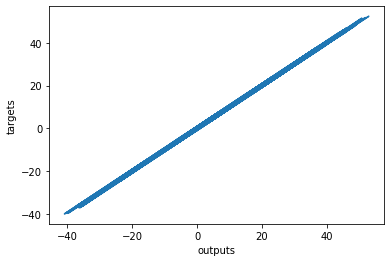

In [15]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

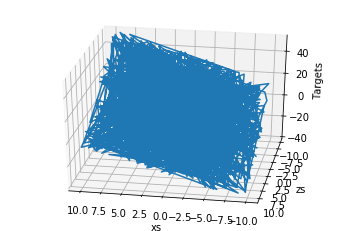

In [16]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Section 5

Same ex with TF
Minimal ex with TF
<br> Import the relevanth libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("Import done")

Import done


Data generation

In [0]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


Solving with TensorFlow

In [0]:
training_data = np.load('TF_intro.npz')

In [42]:
# input_size = 2
# output_size = 1

# model = tf.keras.Sequential([
#                              tf.keras.layers.Dense(output_size)
# ])

# model.compile(optimizer = 'sgd', loss='mean_squared_error')

# model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)

##### the only diff is that verbose=0 / 2

input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 45.6234
Epoch 2/100
1000/1000 - 0s - loss: 4.5445
Epoch 3/100
1000/1000 - 0s - loss: 1.5155
Epoch 4/100
1000/1000 - 0s - loss: 0.6841
Epoch 5/100
1000/1000 - 0s - loss: 0.4396
Epoch 6/100
1000/1000 - 0s - loss: 0.3765
Epoch 7/100
1000/1000 - 0s - loss: 0.3614
Epoch 8/100
1000/1000 - 0s - loss: 0.3534
Epoch 9/100
1000/1000 - 0s - loss: 0.3579
Epoch 10/100
1000/1000 - 0s - loss: 0.3499
Epoch 11/100
1000/1000 - 0s - loss: 0.3624
Epoch 12/100
1000/1000 - 0s - loss: 0.3479
Epoch 13/100
1000/1000 - 0s - loss: 0.3559
Epoch 14/100
1000/1000 - 0s - loss: 0.3569
Epoch 15/100
1000/1000 - 0s - loss: 0.3538
Epoch 16/100
1000/1000 - 0s - loss: 0.3578
Epoch 17/100
1000/1000 - 0s - loss: 0.3588
Epoch 18/100
1000/1000 - 0s - loss: 0.3564
Epoch 19/100
1000/1000 - 0s - loss: 0.3552
Epoch 20/100
1000/1000 - 0s - loss: 0.3602
Epoch 21/100
1000/1000 - 0s - loss: 0.3562
Epoch 22/100
1000/1000 - 0s - loss: 0.3545
Epoch 23/100
1000/1000 - 0s - loss: 0.35

In [43]:
model.layers[0].get_weights()

[array([[ 1.9937168],
        [-3.0111315]], dtype=float32), array([5.021014], dtype=float32)]

In [44]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9937168],
       [-3.0111315]], dtype=float32)

In [45]:
bias = model.layers[0].get_weights()[1]
bias

array([5.021014], dtype=float32)

Extract the outputs (make predictions)

In [0]:
# model.predict_on_batch(training_data['inputs']).round(1)
model.predict_on_batch(training_data['inputs'])


In [0]:
training_data['targets'].round(1)

Plotting the data

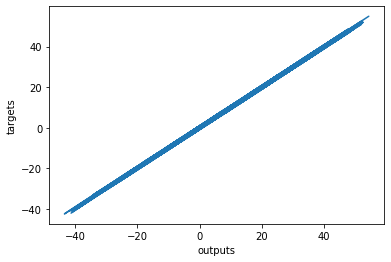

In [53]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Section 6